In [11]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [12]:
# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [13]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [14]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [15]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\hp\kifiya_10_acadamy\kifiya_week2_assignment\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [16]:
##user engagement Analysis 

# Convert times to datetime
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])

# Calculate session metrics
df["Session_Duration"] = (df["End"] - df["Start"]).dt.total_seconds() / 60  # in minutes
df["Session_Traffic"] = df["Total UL (Bytes)"] + df["Total UL (Bytes)"]

# Aggregate metrics per customer
agg_metrics = df.groupby("MSISDN/Number").agg(
    Total_Sessions=("Bearer Id", "count"),
    Total_Duration=("Session_Duration", "sum"),
    Total_Traffic=("Session_Traffic", "sum")
).reset_index()

# Get top 10 customers for each metric
top_sessions = agg_metrics.nlargest(10, "Total_Sessions")
top_duration = agg_metrics.nlargest(10, "Total_Duration")
top_traffic = agg_metrics.nlargest(10, "Total_Traffic")

# Output results
print("Top 10 Customers by Total Sessions:\n", top_sessions)
print("\nTop 10 Customers by Total Duration:\n", top_duration)
print("\nTop 10 Customers by Total Traffic:\n", top_traffic)


Top 10 Customers by Total Sessions:
        MSISDN/Number  Total_Sessions  Total_Duration  Total_Traffic
13526   3.362632e+10              18        146538.0   1.339301e+09
6437    3.361489e+10              17        166120.0   1.378966e+09
13180   3.362578e+10              17        309229.0   1.459155e+09
37052   3.365973e+10              16         67254.0   1.248521e+09
76363   3.367588e+10              15         81094.0   1.163138e+09
92923   3.376054e+10              15        154661.0   1.406957e+09
65118   3.366716e+10              13        145743.0   1.132653e+09
666     3.360313e+10              12        104800.0   8.711753e+08
1279    3.360452e+10              12         86801.0   7.835517e+08
13994   3.362708e+10              12         78391.0   8.905039e+08

Top 10 Customers by Total Duration:
        MSISDN/Number  Total_Sessions  Total_Duration  Total_Traffic
13180   3.362578e+10              17        309229.0   1.459155e+09
6437    3.361489e+10              17     

Cluster Centers:
    Total_Sessions  Total_Duration  Total_Traffic            Cluster
0        2.162013     3532.959725   1.777273e+08     Low Engagement
1        0.999091     1730.920986   8.229788e+07  Medium Engagement
2        4.458657    10051.129578   3.739356e+08    High Engagement


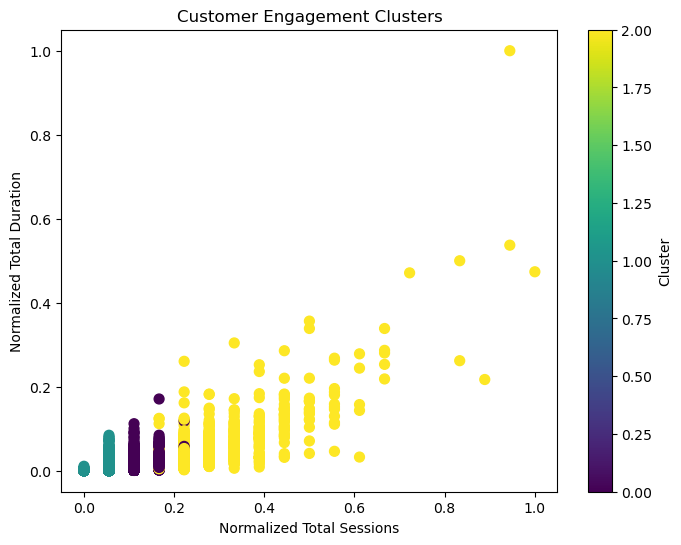

Classified Customers:
         MSISDN/Number  Total_Sessions  Total_Duration  Total_Traffic  \
0        3.360100e+10               1          1946.0     72106216.0   
1        3.360100e+10               1          3021.0     72208918.0   
2        3.360100e+10               1          2250.0     78613640.0   
3        3.360101e+10               1           832.0     40655052.0   
4        3.360101e+10               2           620.0    188561054.0   
...               ...             ...             ...            ...   
106851   3.379000e+10               1           146.0     53432858.0   
106852   3.379000e+10               1          2350.0     71464486.0   
106853   3.197021e+12               1         14623.0     74591830.0   
106854   3.370000e+14               1          4217.0    113305678.0   
106855   8.823971e+14               1         14497.0    120912098.0   

        Engagement_Cluster  
0                        1  
1                        1  
2                        

In [17]:


# Normalize metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(agg_metrics[["Total_Sessions", "Total_Duration", "Total_Traffic"]])

# Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
agg_metrics["Engagement_Cluster"] = kmeans.fit_predict(normalized_metrics)

# Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
clusters_summary = pd.DataFrame(cluster_centers, columns=["Total_Sessions", "Total_Duration", "Total_Traffic"])
clusters_summary["Cluster"] = ["Low Engagement", "Medium Engagement", "High Engagement"]
print("Cluster Centers:\n", clusters_summary)

# Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
plt.scatter(normalized_metrics[:, 0], normalized_metrics[:, 1], c=agg_metrics["Engagement_Cluster"], cmap="viridis", s=50)
plt.title("Customer Engagement Clusters")
plt.xlabel("Normalized Total Sessions")
plt.ylabel("Normalized Total Duration")
plt.colorbar(label="Cluster")
plt.show()

# Output results
print("Classified Customers:\n", agg_metrics)


Cluster Statistics:
    Engagement_Cluster  Min_Total_Sessions  Max_Total_Sessions  \
0                   0                   1                   4   
1                   1                   0                   2   
2                   2                   3                  18   

   Avg_Total_Sessions  Total_Total_Sessions  Min_Total_Duration  \
0            2.162059                 54432               304.0   
1            0.999116                 78008               119.0   
2            4.459062                 16066               781.0   

   Max_Total_Duration  Avg_Total_Duration  Total_Total_Duration  \
0             52915.0         3533.081308            88948855.0   
1             26224.0         1730.938023           135146448.0   
2            309229.0        10052.720233            36219951.0   

   Min_Total_Traffic  Max_Total_Traffic  Avg_Total_Traffic  \
0         94020846.0       3.033058e+08       1.777387e+08   
1          5733784.0       2.093012e+08       8.229825e+

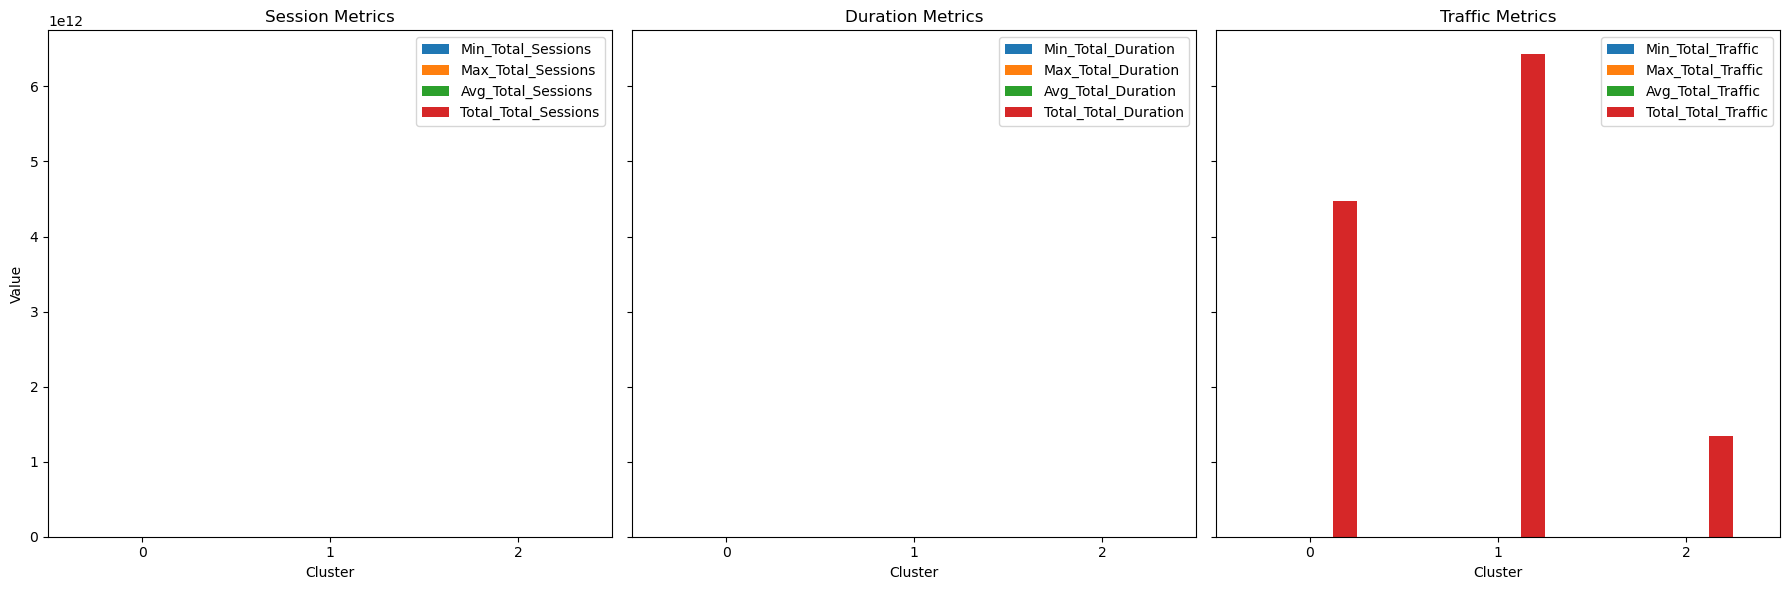

In [18]:


# Compute metrics for each cluster
cluster_stats = agg_metrics.groupby("Engagement_Cluster").agg(
    Min_Total_Sessions=("Total_Sessions", "min"),
    Max_Total_Sessions=("Total_Sessions", "max"),
    Avg_Total_Sessions=("Total_Sessions", "mean"),
    Total_Total_Sessions=("Total_Sessions", "sum"),
    Min_Total_Duration=("Total_Duration", "min"),
    Max_Total_Duration=("Total_Duration", "max"),
    Avg_Total_Duration=("Total_Duration", "mean"),
    Total_Total_Duration=("Total_Duration", "sum"),
    Min_Total_Traffic=("Total_Traffic", "min"),
    Max_Total_Traffic=("Total_Traffic", "max"),
    Avg_Total_Traffic=("Total_Traffic", "mean"),
    Total_Total_Traffic=("Total_Traffic", "sum")
).reset_index()

print("Cluster Statistics:\n", cluster_stats)

# Visualize metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ["Total_Sessions", "Total_Duration", "Total_Traffic"]
titles = ["Session Metrics", "Duration Metrics", "Traffic Metrics"]

for i, metric in enumerate(metrics):
    cluster_stats.plot(
        x="Engagement_Cluster",
        y=[f"Min_{metric}", f"Max_{metric}", f"Avg_{metric}", f"Total_{metric}"],
        kind="bar",
        ax=axes[i],
        title=titles[i],
        ylabel="Value",
        xlabel="Cluster",
        rot=0
    )

plt.tight_layout()
plt.show()


In [19]:
# Calculate total traffic per application
df['Google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']

# Reshape data for analysis
df_melted = df.melt(
    id_vars=["MSISDN/Number"],
    value_vars=["Google", "Email", "Youtube", "Netflix", "Gaming"],
    var_name="Application",
    value_name="Total_Traffic"
)

# Aggregate total traffic per application per user
agg_traffic = df_melted.groupby(["Application", "MSISDN/Number"]).agg(
    Total_Traffic=("Total_Traffic", "sum")
).reset_index()

# Rank users per application
agg_traffic["Rank"] = agg_traffic.groupby("Application")["Total_Traffic"].rank(ascending=False, method="first")

# Get top 10 users per application
top_users_per_app = agg_traffic[agg_traffic["Rank"] <= 10].sort_values(["Application", "Rank"])

# Output results
print("Top 10 Users Per Application:\n", top_users_per_app)


Top 10 Users Per Application:
        Application  MSISDN/Number  Total_Traffic  Rank
13526        Email   3.362632e+10   4.241878e+07   1.0
6437         Email   3.361489e+10   4.078863e+07   2.0
13180        Email   3.362578e+10   4.063397e+07   3.0
106137       Email   3.378632e+10   3.631012e+07   4.0
37052        Email   3.365973e+10   3.599979e+07   5.0
92923        Email   3.376054e+10   3.369377e+07   6.0
76363        Email   3.367588e+10   3.151442e+07   7.0
60087        Email   3.366546e+10   3.041788e+07   8.0
65118        Email   3.366716e+10   3.033580e+07   9.0
86455        Email   3.369879e+10   2.905904e+07  10.0
113293      Gaming   3.361489e+10   7.749432e+09   1.0
199779      Gaming   3.376054e+10   7.461045e+09   2.0
120036      Gaming   3.362578e+10   7.326673e+09   3.0
183219      Gaming   3.367588e+10   6.970568e+09   4.0
120382      Gaming   3.362632e+10   6.887572e+09   5.0
143908      Gaming   3.365973e+10   6.725559e+09   6.0
169884      Gaming   3.366646e+10 

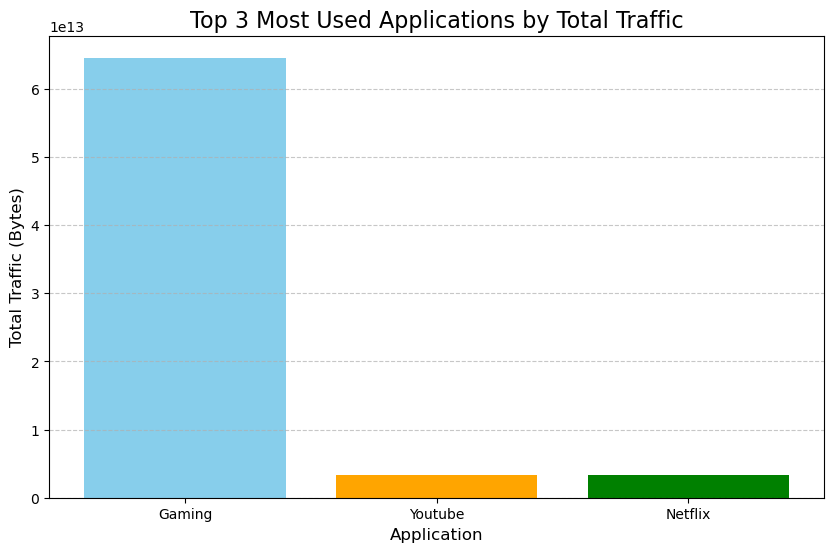

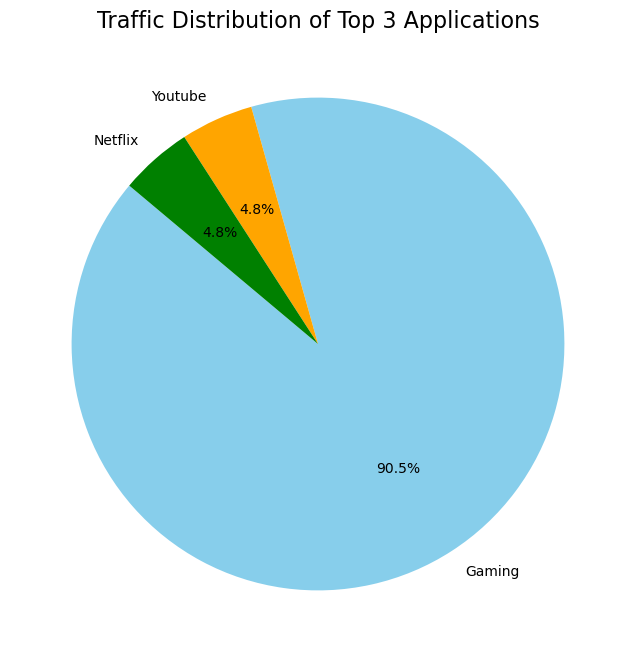

In [20]:

# Calculate total traffic per application
df['Google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']

# Reshape data for analysis
df_melted = df.melt(
    id_vars=["MSISDN/Number"],
    value_vars=["Google", "Email", "Youtube", "Netflix", "Gaming"],
    var_name="Application",
    value_name="Total_Traffic"
)

# Aggregate total traffic for each application
total_traffic_per_app = df_melted.groupby("Application").agg(
    Total_Traffic=("Total_Traffic", "sum")
).reset_index()

# Identify top 3 applications by total traffic
top_3_apps = total_traffic_per_app.nlargest(3, "Total_Traffic")

# Bar chart for top 3 applications
plt.figure(figsize=(10, 6))
plt.bar(top_3_apps["Application"], top_3_apps["Total_Traffic"], color=["skyblue", "orange", "green"])
plt.title("Top 3 Most Used Applications by Total Traffic", fontsize=16)
plt.xlabel("Application", fontsize=12)
plt.ylabel("Total Traffic (Bytes)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Pie chart for top 3 applications
plt.figure(figsize=(8, 8))
plt.pie(
    top_3_apps["Total_Traffic"], 
    labels=top_3_apps["Application"], 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=["skyblue", "orange", "green"]
)
plt.title("Traffic Distribution of Top 3 Applications", fontsize=16)
plt.show()



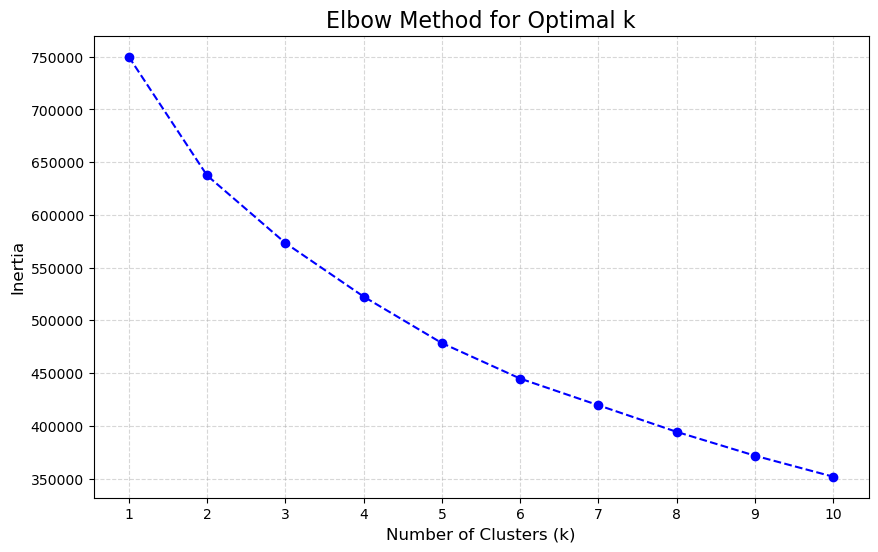

KeyboardInterrupt: 

In [21]:
from sklearn.metrics import silhouette_score

# Prepare data for clustering
engagement_metrics = df[["Google", "Email", "Youtube", "Netflix", "Gaming"]]
scaler = StandardScaler()
engagement_metrics_scaled = scaler.fit_transform(engagement_metrics)

# Determine optimal k using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal k", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_range)
plt.grid(alpha=0.5, linestyle="--")
plt.show()

# Silhouette scores for additional insight
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_scaled)
    silhouette_scores.append(silhouette_score(engagement_metrics_scaled, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title("Silhouette Scores for Optimal k", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(range(2, 11))
plt.grid(alpha=0.5, linestyle="--")
plt.show()


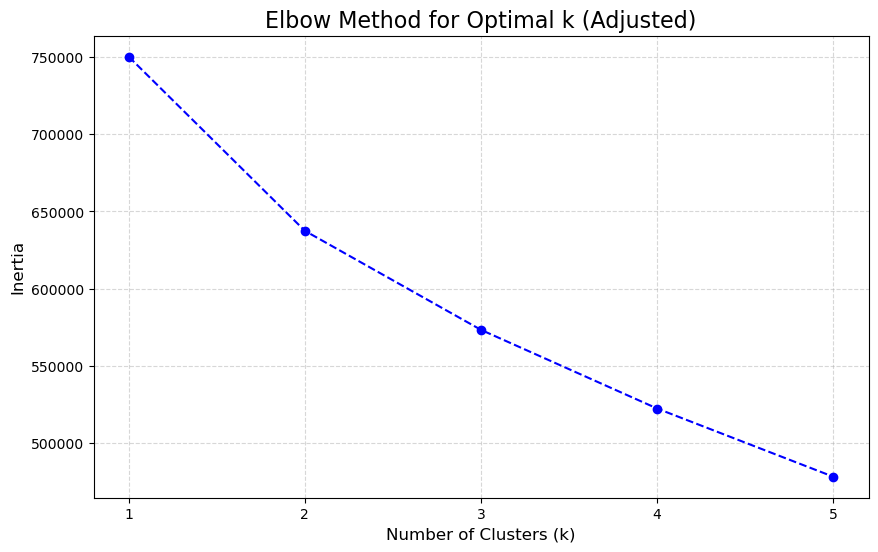

KeyboardInterrupt: 

In [14]:
# Adjusting k range for the number of samples
k_range = range(1, 6)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal k (Adjusted)", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_range)
plt.grid(alpha=0.5, linestyle="--")
plt.show()

# Silhouette scores for additional insight
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_scaled)
    silhouette_scores.append(silhouette_score(engagement_metrics_scaled, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title("Silhouette Scores for Optimal k (Adjusted)", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(range(2, 6))
plt.grid(alpha=0.5, linestyle="--")
plt.show()
